# Demo – Performing T-Tests


In this demo, you will be shown how to perform T-tests.

# Scenario

We have a data of students in a university. Administrator of this university wants to test some assumptions regarding the college. So the administrator uses the statistical tests to check those assumptions.
    
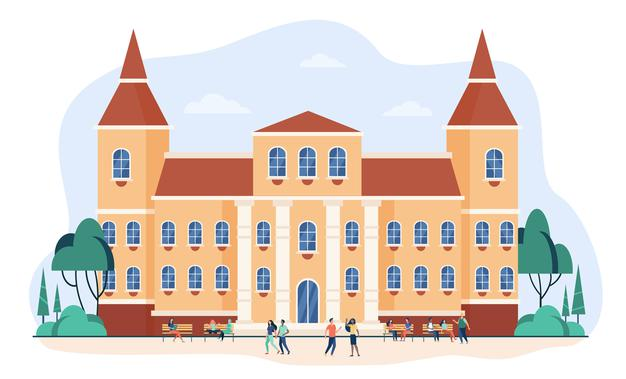


The data set has following columns:
    1. stud.id
    2. name
    3. gender
    4. age
    5. height
    6. weight
    7. religion
    8. nc.score
    9. semester
    10. major
    11. minor
    12. score1
    13. score2
    14. online.tutorial
    15. graduated
    16. salary
<br>
<br>

# Topics covered:
    - T-tests

# Objectives
In this demo we will,
- Draw conclusions about the data
- Apply types of T–test to know the difference in sample means

In [1]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading a csv file

data = pd.read_csv('students.csv')
data.head()

stud.id                 name  gender  age  height  weight    religion  \
1   833917  Gonzales, Christina  Female   19     160    64.8      Muslim   
2   898539       Lozano, T'Hani  Female   19     172    73.0       Other   
3   379678       Williams, Hanh  Female   22     168    70.6  Protestant   
4   807564          Nem, Denzel    Male   19     183    79.7       Other   
5   383291      Powell, Heather  Female   21     175    71.4    Catholic   

   nc.score semester                   major                       minor  \
1      1.91      1st       Political Science             Social Sciences   
2      1.56      2nd         Social Sciences  Mathematics and Statistics   
3      1.24      3rd         Social Sciences  Mathematics and Statistics   
4      1.37      2nd  Environmental Sciences  Mathematics and Statistics   
5      1.46      1st  Environmental Sciences  Mathematics and Statistics   

   score1  score2  online.tutorial  graduated  salary  
1     NaN     NaN                0          0     NaN  
2     NaN     NaN                0          0     NaN  
3    45.0    46.0                0          0     NaN  
4     NaN     NaN                0          0     NaN  
5     NaN     NaN                0          0     NaN

In [3]:
data = data.dropna()

## One Sample T-Test
### Q. Find whether the average height of the students in the university is 170cms or not?
The hypothesis testing is done in 5 steps
    1. Determine the hypothesis statements
    2. Collecting data
    3. Determine the significance level
    4. Statistical test
    5. Interpret the result
    
<b>1. Determine the hypothesis statement</b><br>
<b>Null Hypothesis (H0):</b> The average height of the students in a university is 170cms<br>
<b>Alternative Hypothesis (H1):</b> The average height of the students in a university is not 170cms 

<b>2. Collecting data</b><br>
A sample data of heights of 20 people is collected to test the hypothesis.<br> 
Let us consider that we have sample of data, with sample size(n) = 20


In [4]:
heights = data.height.sample(20, random_state = 1)
heights

5019    187
4477    162
241     184
7166    175
2489    184
1194    186
242     183
2969    183
1476    181
6765    185
1965    180
4372    182
7076    188
3440    166
1892    176
2665    158
3820    151
5413    178
1088    172
3477    189
Name: height, dtype: int64

We have obtained the data required for the hypothesis test
<br><br><br>
<b>3. Determine Significance Level</b><br>
Let us consider a significance level of 0.05, it means we are 95% confident about the hypothesis test

In [5]:
# determining significance level

alpha = 0.05

<b>4. Statitical Test</b><br>
We can perform the t – test as we don’t know the population standard deviation

Find the critical point using Percent Point Function(PPF) or by using t-table <br>
We need significance level and degrees of freedom to find the critical value<br>

alpha = 0.05<br>
DOF = n-1 = 20-1 = 19

In [6]:
# Student t-distribution Percent Point Function
from scipy.stats import t

# define probability
p = 1-alpha/2
df = 19

# retrieve value <= probability
critical_value = t.ppf(p, df)
print("The critical value of 95% confidence level and with 19 degrees of freedom:",critical_value)

The critical value of 95% confidence level and with 19 degrees of freedom: 2.093024054408263


Let us calculate the T-statistic value<br>

In [7]:
from scipy.stats import ttest_1samp

# Calculating t-statistic and p-value
t_statistic, p_value = ttest_1samp(heights, 170)
print('The t-statistic value is',t_statistic)
print('The p-value is',p_value)

The t-statistic value is 3.1611686727030404
The p-value is 0.005142477642141248


<b>5. Interpret the Result</b>

If the T–statistic is greater than critical value then we reject the Null Hypothesis.

In [8]:
# interpreting the result

if -(critical_value) < t_statistic > +(critical_value):
    print('We reject the null hypothesis. The average height of the students in a university is not 170cms')
else:
    print('We fail to reject the null hypothesis. The average height of the students in a university is 170cms')

We reject the null hypothesis. The average height of the students in a university is not 170cms


### Inference
We have performed a hypothesis test to check whether the students in a university is 170cms or not.<br>
After performing the hypothesis test we conclude that the students in a university is 170cms

## Independent Two Sample T-Test
### Q. Find whether there is any difference in the average scores of male and female students or not?
The hypothesis testing is done in 5 steps
    1. Determine the hypothesis statements
    2. Collecting data
    3. Determine the significance level
    4. Statistical test
    5. Interpret the result
    
<b>1. Determine the hypothesis statement</b><br>
<b>Null Hypothesis (H0):</b> The average score of males and females in a university is equal<br>
<b>Alternative Hypothesis (H1):</b> The average score of males and females in a university is not equal 

<b>2. Collecting data</b><br>
A sample data of scores of 30 males and 30 females is collected to test the hypothesis.<br> 

In [9]:
males = data[data.gender=='Male']
male_scores = males['nc.score'].sample(30, random_state = 1)
male_scores

3635    1.67
7315    2.66
7390    2.94
941     1.96
5239    1.78
794     2.53
352     3.56
2119    3.34
1096    3.50
5176    2.23
6570    2.17
1569    2.65
6262    1.88
6102    2.51
5048    1.94
4143    1.85
4785    3.85
4507    2.60
1561    2.32
311     2.67
7688    1.33
1545    2.09
5841    2.67
3811    2.77
4329    1.69
617     3.71
7823    3.61
5640    3.01
3988    3.04
5906    2.03
Name: nc.score, dtype: float64

In [10]:
females = data[data.gender=='Female']
female_scores = females['nc.score'].sample(30, random_state = 1)
female_scores

4574    3.07
7505    2.15
4267    1.01
6099    1.35
790     1.34
810     1.63
8228    1.80
4179    1.71
7950    1.34
8045    2.72
1682    2.27
1443    3.21
7530    2.33
4199    1.97
6573    1.43
3299    3.49
1058    2.45
5152    1.71
896     2.27
6953    1.10
6638    2.38
6725    1.55
331     1.23
3511    1.43
1342    1.72
2601    1.45
4988    1.34
788     3.38
6670    3.71
2778    1.20
Name: nc.score, dtype: float64

We have obtained the data required for the hypothesis test
<br><br><br>
<b>3. Determine Significance Level</b><br>
Let us consider a significance level of 0.05, it means we are 95% confident about the hypothesis test

In [11]:
# determining significance level

alpha = 0.05

<b>4. Statitical Test</b><br>
We can perform the Independent Two Sample T–test 

Find the critical point using Percent Point Function(PPF) or by using t-table <br>
We need significance level and degrees of freedom to find the critical value<br>

alpha = 0.05<br>
DOF = (n1-1)+(n2-1) = 29+29 = 58

In [12]:
# Student t-distribution Percent Point Function
from scipy.stats import t

# define probability
p = 1-alpha/2
df = 58

# retrieve value <= probability
critical_value = t.ppf(p, df)
print("The critical value of 95% confidence level and with 58 degrees of freedom:",critical_value)

The critical value of 95% confidence level and with 58 degrees of freedom: 2.0017174830120923


Let us calculate the T-statistic value<br>

In [13]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(male_scores, female_scores)

print('t-statistic value is:',t_statistic)
print('p-value is:',p_value)

t-statistic value is: 2.9905698767627094
p-value is: 0.0040818992284043015


<b>5. Interpret the Result</b>

If the t – statistic is greater than critical value then we reject the Null Hypothesis.

In [14]:
# interpreting the result

if -(critical_value) < t_statistic > +(critical_value):
    print('We reject the null hypothesis. The average score of males and females in a university is not equal')
else:
    print('We fail to reject the null hypothesis. The average score of males and females in a university is equal')

We reject the null hypothesis. The average score of males and females in a university is not equal


### Inference
We have performed a hypothesis test to check whether the average score of males and females in a university is equal or not.<br>
After performing the hypothesis test and we conclude that there is no significant difference between the scores of males and females

## Paired Sample T-Test
### Q. Find whether there is any difference in the average scores of students in test-1 and test-2?
The hypothesis testing is done in 5 steps
    1. Determine the hypothesis statements
    2. Collecting data
    3. Determine the significance level
    4. Statistical test
    5. Interpret the result
    
<b>1. Determine the hypothesis statement</b><br>
<b>Null Hypothesis (H0):</b> There is no difference in the performance of students in test-1 and test-2<br>
<b>Alternative Hypothesis (H1):</b> There is difference in the performance of students in test-1 and test-2

<b>2. Collecting data</b><br>
A sample data of scores of 40 students is collected to test the hypothesis.<br> 

In [15]:
scores = data.sample(40, random_state=1)
score1 = scores.score1
score2 = scores.score2

We have obtained the data required for the hypothesis test
<br><br><br>
<b>3. Determine Significance Level</b><br>
Let us consider a significance level of 0.05, it means we are 95% confident about the hypothesis test

In [16]:
# determining significance level

alpha = 0.05

<b>4. Statitical Test</b><br>
We can perform the Paired Sample T–test 

Find the critical point using Percent Point Function(PPF) or by using t-table <br>
We need significance level and degrees of freedom to find the critical value<br>

alpha = 0.05<br>
DOF = (n-1) = 39

In [17]:
# Student t-distribution Percent Point Function
from scipy.stats import t

# define probability
p = 1-alpha/2
df = 39

# retrieve value <= probability
critical_value = t.ppf(p, df)
print("The critical value of 95% confidence level and with 39 degrees of freedom:",critical_value)

The critical value of 95% confidence level and with 39 degrees of freedom: 2.022690911734728


Let us calculate the t-statistic value<br>

In [18]:
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(score1, score2)

print('t-statistic value is:',t_statistic)
print('p-value is:',p_value)

t-statistic value is: -2.713325521938384
p-value is: 0.009864069208683993


In [19]:
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(score1, score2)

print('t-statistic value is:',t_statistic)
print('p-value is:',p_value)

t-statistic value is: -2.713325521938384
p-value is: 0.009864069208683993


<b>5. Interpret the Result</b>

If the T–statistic is greater than +(critical value) or less than -(critical value) then we reject the Null Hypothesis.

In [20]:
if -(critical_value) < t_statistic < +(critical_value):
    print('Fail to reject Null Hypothesis. There is no difference in the performance of students in test-1 and test-2.')
else:
    print('Reject Null Hypothesis. There is difference in the performance of students in test-1 and test-2')

Reject Null Hypothesis. There is difference in the performance of students in test-1 and test-2


### Inference
We have performed a hypothesis test to check whether there is difference in the performance of students in test-1 and test-2 or not.<br>
After performing the hypothesis test and we conclude that there is difference in the performance of students in test-1 and test-2